# Power of AI. Are you in it ??

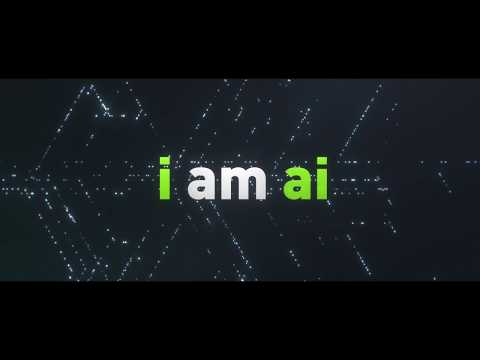

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('GiZ7kyrwZGQ')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import quandl
import datetime
import pandas as pd
from sklearn import preprocessing
#from sklearn import cross_validation
#style.use('ggplot')
%matplotlib inline

In [3]:
quandl.ApiConfig.api_key = "TYyfSn2Tm2RfkzuuvCKL"

In [4]:
df = quandl.get('NSE/INFY')

In [5]:
df = df.reset_index()
df = df.dropna()
print(df.head())

        Date     Open     High     Low    Last    Close  Total Trade Quantity  \
0 2011-06-29  2868.00  2907.00  2868.0  2880.0  2881.75              600094.0   
1 2011-06-30  2886.05  2919.00  2881.5  2903.1  2910.45             1417730.0   
2 2011-07-01  2935.00  2969.95  2924.1  2928.0  2934.15              800308.0   
3 2011-07-04  2966.65  2977.00  2935.0  2941.0  2938.95              514324.0   
4 2011-07-05  2957.00  2969.90  2926.0  2959.0  2956.45              802966.0   

   Turnover (Lacs)  
0         17320.05  
1         41163.32  
2         23549.85  
3         15162.29  
4         23701.22  


<h2> Model Building & Testing Methodology </h2>
<img src="./images/train_test.png" alt="Train & Test Methodology" >
<h2> Linear Regression "Any School Memories of Eqn of line ?" </h2>
<img src = "./images/lin_reg.jpg" alt = "Lin-Regression">

In [6]:
prices = df['Close'].tolist()
dates = df.index.tolist()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

In [7]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan (Not a Number)
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    #X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) #cross validation 
    X_train = X[0:int(len(X)*(1-test_size))]
    X_test = X[-int(len(X)*test_size):]
    Y_train = y[0:int(len(y)*(1-test_size))]
    Y_test = y[-int(len(y)* test_size):]
    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response

In [8]:
forecast_col = 'Close'#choosing which column to forecast
forecast_out = 10 #how far to forecast 
test_size = 0.2#the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size)

In [ ]:
learner = LinearRegression(); #initializing linear regression model

learner.fit(X_train,Y_train); #training the linear regression model
score=learner.score(X_test,Y_test);#testing the linear regression model

forecast= learner.predict(X_lately); #set that will contain the forecasted data

response={};#creting json object
response['test_score']=score; 
response['forecast_set']=forecast;

print(response)

In [ ]:
# Build Set Graph
plt.figure(figsize=(16,8))
plt.plot(df.Date, df.Close, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(df.Date[-len(X_test):], learner.predict(X_test), color='blue', linewidth=1, label = 'Predicted Price') #plotting the line made by linear regression
plt.plot(pd.date_range('2019-01-07', '2019-01-18', freq= pd.tseries.offsets.BDay()), learner.predict(X_lately),
        color = 'green', linewidth = 1, label = 'Forecasted Price')
plt.title('Stock Price Forecasting: Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

# Build Forecasting Graph
plt.figure(figsize=(16,8))
#plt.plot(df.Date, df.Close, color='yellow', label= 'Actual Price') #plotting the initial datapoints
#plt.plot(df.Date[-len(X_test):], learner.predict(X_test), color='blue', linewidth=1, label = 'Predicted Price') #plotting the line made by linear regression
plt.plot(pd.date_range('2019-01-07', '2019-01-18', freq= pd.tseries.offsets.BDay()), learner.predict(X_lately),
        color = 'green', linewidth = 1, label = 'Forecasted Price')
plt.title('Stock Price Forecasting: Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [11]:
df_forecasted = pd.DataFrame({"Dates":pd.date_range('2019-01-07', '2019-01-18', freq= pd.tseries.offsets.BDay()),
                             "Forecasted_Price":forecast})
df_forecasted # forecasted value in a data frame object

,Dates,Forecasted_Price
0,2019-01-07,680.715439
1,2019-01-08,683.429527
2,2019-01-09,678.631407
3,2019-01-10,690.990202
4,2019-01-11,691.135600
5,2019-01-14,693.074234
6,2019-01-15,698.987069
7,2019-01-16,702.864338
8,2019-01-17,702.961270
9,2019-01-18,695.109800


In [ ]:
# For finding business date from a specific date
import datetime
def date_by_adding_business_days(from_date, add_days):
    business_days_to_add = add_days
    current_date = from_date
    while business_days_to_add > 0:
        current_date += datetime.timedelta(days=1)
        weekday = current_date.weekday()
        if weekday >= 5: # sunday = 6
            continue
        business_days_to_add -= 1
    return current_date

#demo:
print('10 business days from today:')
print(date_by_adding_business_days(datetime.datetime.strptime('2019-01-04', '%Y-%m-%d'), 10))

## Closing Thoughts for the day to Open Up our Thoughts !!

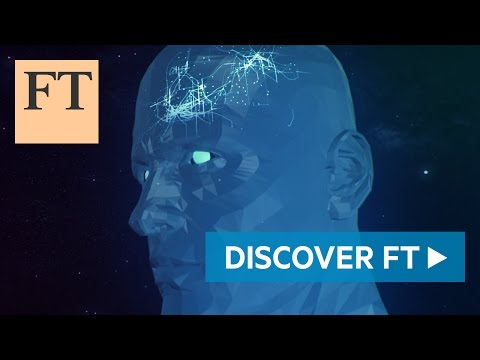

In [12]:
YouTubeVideo('kC72nnR8EW8')